# Word Vectors/ Word Embeddings

#### One Hot Vectors
Suppose that you have a 1000 words vocabulary. Each word can be represented by a vector of dimention 1000 (with each vector, just representing that a particular word is that word or not (i.e made up of all 0s except ONE 1))
- The size is huge
- There is no embedded meaning

#### Word Embedding Vectors
Vectors based upon ideas, and have a relatively smaller size. Thse vectors carry the meaning of the words, and are comparitively more useful in NLP Applications.

## How do we create Word Embeddings from a Corpus?

For training word-embeddings, a semi-supervised approach is use, as whilst the trainging data set is not labelled, it does conta data to supervise this learning proces. This combination of supervised and undupervised learning is known as self-supervised learning.

## Word Embedding Methods
1. word2vec (Google) : This uses a shallow neural netword.
- continous-bag-of-words
- continous skip-gram

2. Global Vectors (GloVe) [Stanford] : does not use neural networs at all.

3. fastText [Facebook]
- this model supports, out of vocabulary words, by inferring their meaning from the sequence of characters used in the word.
- word embedding vectors can be averaged together to create meaning of the sentences.

4. Deep Learning, Contextual Embaddings [Transformer Methods.]
- BERT [Google]
- ELMo [Allen Institute of AI]
- GPT-2 [OpenAI]

# Continous-Bag-Of-Words Model

If two words are frequently surrounded by each other, it is highly likely that they are related in meaning (i.e semantically related.) 
The context words (C, which is a hyperparameter), is fed in, and the centre word is attempted to be predicted.

### Cleaning
- Words should be case insensitive
- Puntuations, can be represented as a single unique words. Non-Inturrepting Puntucations can be ignored
- Numbers, can be ignored, but some numbers can have significance.
- Special Characters: It is usually sage to drop them
- Special Words : Emoji, or HashTags.

In [1]:
# import nltk
# form nltk.tokenize import word_tokenize
# import emoji

# nltk.download('punkt') # punck is a pre-trained tokenizer for English, which handles punctuations.

# courpus = "Who ❤️ "word embeddings" in 2022? I do!!!"

# data = re.sub(r'[,!?;-]+' , '.', corpus)
# #corpus now becomes: Who ❤️ "word embeddings" in 2022. I do.

# data = nltk.word_tokenize(data)
# data = [ch.lower for ch in data if ch.isalpha() or ch == '.' or emoji.get_emoji_regexp().search(ch)]

### Sliding Window

In [2]:
# def get_windows(words, C):
#     i = C
#     while(i < len(words) - C):
#         center_word = words[i]
#         context_words = word[(i-C):i] + words[(i+1):(i+C+1)]
#         yeild context_words, center_word  #yeild does not immediately exit a function
#         i += 1

# Architecture of the CBOW Model

It has one input layer, one hidden layer and one output layer.

### Dimensions
X = Context words matrix is a V*m matrix
H = is a N*m matrix
Y(hat) = is a V*m matrix
m is the batch size.

### Activation Function
ReLU 
and softmax

## Cost Function

Loss Function used here is the cross-entropy loss function which is often used alogn with the soft max function

J = - sigma (y_k log(y_k^))

## Forward and Back Propagation

Back Propagation calculats the partial derivatives of the cost with respect to weights and biases. This is a prime example of dynamic programming.

J_batch = f(W1, W2, b1, b2)

The other concept is using, Gradient Descent, after having the gradients, using the learning parameter (alpha).
A smaller alpha allows for a slower update of the weights and biases.

## Extracting the Word Embeddings, from the weights predicted by the NeuralNet

1. Take W1
2. Take W2
3. Take an average for W1 and W2


# Evaluation Metrics

1. Intrinsic Evaluation
It tests the relationships between the words. [Both semantic and syntax]. 
- This can be done by finding missing analogies. There is a possibility of ambuigity.
- Thic can also be done by ysing Clustering.
- Visualization

2. Extrincsic Evaluation
This is used to evaluate for external tasks. These are the ultimate tests to ensure that a model does what it was intended to do.



# Word Embeddings First Steps: Data Preparation

In this series of ungraded notebooks, you'll try out all the individual techniques that you learned about in the lectures. Practicing on small examples will prepare you for the graded assignment, where you will combine the techniques in more advanced ways to create word embeddings from a real-life corpus. 

This notebook focuses on data preparation, which is the first step of any machine learning algorithm. It is a very important step because models are only as good as the data they are trained on and the models used require the data to have a particular structure to process it properly.

To get started, import and initialize all the libraries you will need.

In [3]:
import re
import nltk
from nltk import punkt
import emoji
import numpy as np
from nltk.tokenize import word_tokenize
from utils2 import get_dict

# Data preparation

In the data preparation phase, starting with a corpus of text, you will:

- Clean and tokenize the corpus.

- Extract the pairs of context words and center word that will make up the training data set for the CBOW model. The context words are the features that will be fed into the model, and the center words are the target values that the model will learn to predict.

- Create simple vector representations of the context words (features) and center words (targets) that can be used by the neural network of the CBOW model.

## Cleaning and tokenization

To demonstrate the cleaning and tokenization process, consider a corpus that contains emojis and various punctuation signs.

In [4]:
# Define a corpus
corpus = 'Who ❤️ "word embeddings" in 2020? I do!!!'
# Replace all the punctuations in the courpus
data = re.sub(r'[,!?;-]+', '.', corpus)
print(f'After cleaning punctuation:  {data}')

After cleaning punctuation:  Who ❤️ "word embeddings" in 2020. I do.


Next, use NLTK's tokenization engine to split the corpus into individual tokens.

In [5]:
# Tokenize the cleaned corpus
data = nltk.word_tokenize(data)

#Getting rid of numbers and other punctuations.
data = [ch.lower() for ch in data
        if ch.isalpha() or ch == '.' or emoji.get_emoji_regexp().search(ch)]

# Print the tokenized and filtered version of the corpus
print(f'After cleaning:  {data}')

After cleaning:  ['who', '❤️', 'word', 'embeddings', 'in', '.', 'i', 'do', '.']


Note that the heart emoji is considered as a token just like any normal word.

Now let's streamline the cleaning and tokenization process by wrapping the previous steps in a function.

In [6]:
# Define the 'tokenize' function that will include the steps previously seen
def tokenize(corpus):
    data = re.sub(r'[,!?;-]+', '.', corpus)
    data = nltk.word_tokenize(data)  # tokenize string to words
    data = [ ch.lower() for ch in data
             if ch.isalpha()
             or ch == '.'
             or emoji.get_emoji_regexp().search(ch)
           ]
    return data

Apply this function to the corpus that you'll be working on in the rest of this notebook: "I am happy because I am learning"

In [7]:
# Define new corpus
corpus = 'I am happy because I am learning'

# Print new corpus
print(f'Corpus:  {corpus}')

# Save tokenized version of corpus into 'words' variable
words = tokenize(corpus)

# Print the tokenized version of the corpus
print(f'Words (tokens):  {words}')

Corpus:  I am happy because I am learning
Words (tokens):  ['i', 'am', 'happy', 'because', 'i', 'am', 'learning']


## Sliding window of words

Now that you have transformed the corpus into a list of clean tokens, you can slide a window of words across this list. For each window you can extract a center word and the context words.

The `get_windows` function in the next cell was introduced in the lecture.

In [8]:
# Define the 'get_windows' function
def get_windows(words, C):
    i = C
    while i < len(words) - C:
        center_word = words[i]
        context_words = words[(i - C):i] + words[(i+1):(i+C+1)]
        yield context_words, center_word
        i += 1

The first argument of this function is a list of words (or tokens). The second argument, `C`, is the context half-size. Recall that for a given center word, the context words are made of `C` words to the left and `C` words to the right of the center word.

Here is how you can use this function to extract context words and center words from a list of tokens. These context and center words will make up the training set that you will use to train the CBOW model.

In [9]:
# Print 'context_words' and 'center_word' for the new corpus with a 'context half-size' of 2
for x, y in get_windows(['i', 'am', 'happy', 'because', 'i', 'am', 'learning'], 2):
    print(f'{x}\t{y}')

['i', 'am', 'because', 'i']	happy
['am', 'happy', 'i', 'am']	because
['happy', 'because', 'am', 'learning']	i


## Transforming words into vectors for the training set

To finish preparing the training set, you need to transform the context words and center words into vectors.

### Mapping words to indices and indices to words

The center words will be represented as one-hot vectors, and the vectors that represent context words are also based on one-hot vectors.

To create one-hot word vectors, you can start by mapping each unique word to a unique integer (or index). We have provided a helper function, `get_dict`, that creates a Python dictionary that maps words to integers and back.

In [10]:
def get_dict(data):
    """
    Input:
        K: the number of negative samples
        data: the data you want to pull from
        indices: a list of word indices
    Output:
        word_dict: a dictionary with the weighted probabilities of each word
        word2Ind: returns dictionary mapping the word to its index
        Ind2Word: returns dictionary mapping the index to its word
    """
    #
    #     words = nltk.word_tokenize(data)
    words = sorted(list(set(data)))
    n = len(words)
    idx = 0
    # return these correctly
    word2Ind = {}
    Ind2word = {}
    for k in words:
        word2Ind[k] = idx
        Ind2word[idx] = k
        idx += 1
    return word2Ind, Ind2word

In [11]:
# Get 'word2Ind' and 'Ind2word' dictionaries for the tokenized corpus
word2Ind, Ind2word = get_dict(words)

In [12]:
# Print 'word2Ind' dictionary
word2Ind

{'am': 0, 'because': 1, 'happy': 2, 'i': 3, 'learning': 4}

In [13]:
# Print 'Ind2word' dictionary
Ind2word

{0: 'am', 1: 'because', 2: 'happy', 3: 'i', 4: 'learning'}

### Getting one-hot word vectors

Recall from the lecture that you can easily convert an integer, $n$, into a one-hot vector.

Consider the word "happy". First, retrieve its numeric index.

In [14]:
# Save index of word 'happy' into the 'n' variable
n = word2Ind['happy']
V = len(word2Ind)

#One Hot Vector
center_word_vector = np.zeros(V)
center_word_vector[n] = 1

center_word_vector

array([0., 0., 1., 0., 0.])

In [15]:
# Define the 'word_to_one_hot_vector' function that will include the steps previously seen
def word_to_one_hot_vector(word, word2Ind, V):
    one_hot_vector = np.zeros(V)
    one_hot_vector[word2Ind[word]] = 1
    return one_hot_vector

Check that it works as intended.

In [16]:
# Print output of 'word_to_one_hot_vector' function for word 'happy'
word_to_one_hot_vector('happy', word2Ind, V)

array([0., 0., 1., 0., 0.])

### Getting context word vectors

In [17]:
# Define list containing context words
context_words = ['i', 'am', 'because', 'i']
context_words_vectors = [word_to_one_hot_vector(w, word2Ind, V) for w in context_words]
np.mean(context_words_vectors, axis = 0)

array([0.25, 0.25, 0.  , 0.5 , 0.  ])

Note the `axis=0` parameter that tells `mean` to calculate the average of the rows (if you had wanted the average of the columns, you would have used `axis=1`).

In [18]:
# Define the 'context_words_to_vector' function that will include the steps previously seen
def context_words_to_vector(context_words, word2Ind, V):
    context_words_vectors = [word_to_one_hot_vector(w, word2Ind, V) for w in context_words]
    context_words_vectors = np.mean(context_words_vectors, axis=0)
    return context_words_vectors


## Building the training set

You can now combine the functions that you created in the previous sections, to build a training set for the CBOW model, starting from the following tokenized corpus.

In [19]:
# Print corpus
words

['i', 'am', 'happy', 'because', 'i', 'am', 'learning']

To do this you need to use the sliding window function (`get_windows`) to extract the context words and center words, and you then convert these sets of words into a basic vector representation using `word_to_one_hot_vector` and `context_words_to_vector`.

In [20]:
# Print vectors associated to center and context words for corpus
for context_words, center_word in get_windows(words, 2):  # reminder: 2 is the context half-size
    print(f'Context words:  {context_words} -> {context_words_to_vector(context_words, word2Ind, V)}')
    print(f'Center word:  {center_word} -> {word_to_one_hot_vector(center_word, word2Ind, V)}')
    print()

Context words:  ['i', 'am', 'because', 'i'] -> [0.25 0.25 0.   0.5  0.  ]
Center word:  happy -> [0. 0. 1. 0. 0.]

Context words:  ['am', 'happy', 'i', 'am'] -> [0.5  0.   0.25 0.25 0.  ]
Center word:  because -> [0. 1. 0. 0. 0.]

Context words:  ['happy', 'because', 'am', 'learning'] -> [0.25 0.25 0.25 0.   0.25]
Center word:  i -> [0. 0. 0. 1. 0.]



In this practice notebook you'll be performing a single iteration of training using a single example, but in this week's assignment you'll train the CBOW model using several iterations and batches of example.
Here is how you would use a Python generator function (remember the `yield` keyword from the lecture?) to make it easier to iterate over a set of examples.

In [21]:
# Define the generator function 'get_training_example'
def get_training_example(words, C, word2Ind, V):
    for context_words, center_word in get_windows(words, C):
        yield context_words_to_vector(context_words, word2Ind, V), word_to_one_hot_vector(center_word, word2Ind, V)

The output of this function can be iterated on to get successive context word vectors and center word vectors, as demonstrated in the next cell.

In [22]:
# Print vectors associated to center and context words for corpus using the generator function
for context_words_vector, center_word_vector in get_training_example(words, 2, word2Ind, V):
    print(f'Context words vector:  {context_words_vector}')
    print(f'Center word vector:  {center_word_vector}')
    print()

Context words vector:  [0.25 0.25 0.   0.5  0.  ]
Center word vector:  [0. 0. 1. 0. 0.]

Context words vector:  [0.5  0.   0.25 0.25 0.  ]
Center word vector:  [0. 1. 0. 0. 0.]

Context words vector:  [0.25 0.25 0.25 0.   0.25]
Center word vector:  [0. 0. 0. 1. 0.]



# Word Embeddings: Intro to CBOW model, activation functions and working with Numpy

In this lecture notebook you will be given an introduction to the continuous bag-of-words model, its activation functions and some considerations when working with Numpy. 

Let's dive into it!

In [23]:
import numpy as np

# The continuous bag-of-words model

The CBOW model is based on a neural network, the architecture of which looks like the figure below, as you'll recall from the lecture.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='./images/cbow_model_architecture.png' alt="alternate text" width="width" height="height" style="width:917;height:337;" /> Figure 1 </div>


## Activation functions

Let's start by implementing the activation functions, ReLU and softmax.

### ReLU

ReLU is used to calculate the values of the hidden layer, in the following formulas:

\begin{align}
 \mathbf{z_1} &= \mathbf{W_1}\mathbf{x} + \mathbf{b_1}  \tag{1} \\
 \mathbf{h} &= \mathrm{ReLU}(\mathbf{z_1})  \tag{2} \\
\end{align}


Let's fix a value for $\mathbf{z_1}$ as a working example.

In [24]:
# Define a random seed so all random outcomes can be reproduced
np.random.seed(10)

# Define a 5X1 column vector using numpy
z_1 = 10*np.random.rand(5, 1)-5

# Print the vector
z_1

array([[ 2.71320643],
       [-4.79248051],
       [ 1.33648235],
       [ 2.48803883],
       [-0.01492988]])

Notice that using numpy's `random.rand` function returns a numpy array filled with values taken from a uniform distribution over [0, 1). Numpy allows vectorization so each value is multiplied by 10 and then substracted 5.

In [25]:
# Create copy of vector and save it in the 'h' variable
h = z_1.copy()
# Slice the array or vector. This is the same as applying ReLU to it
h[h < 0] = 0

**Now implement ReLU as a function.**

In [26]:
# Define the 'relu' function that will include the steps previously seen
def relu(z):
    result = z.copy()
    result[result < 0] = 0
    return result

In [27]:
# Define a new vector and save it in the 'z' variable
z = np.array([[-1.25459881], [ 4.50714306], [ 2.31993942], [ 0.98658484], [-3.4398136 ]])

# Apply ReLU to it
relu(z)

array([[0.        ],
       [4.50714306],
       [2.31993942],
       [0.98658484],
       [0.        ]])

### Softmax

The second activation function that you need is softmax. This function is used to calculate the values of the output layer of the neural network, using the following formulas:

\begin{align}
 \mathbf{z_2} &= \mathbf{W_2}\mathbf{h} + \mathbf{b_2}   \tag{3} \\
 \mathbf{\hat y} &= \mathrm{softmax}(\mathbf{z_2})   \tag{4} \\
\end{align}

To calculate softmax of a vector $\mathbf{z}$, the $i$-th component of the resulting vector is given by:

$$ \textrm{softmax}(\textbf{z})_i = \frac{e^{z_i} }{\sum\limits_{j=1}^{V} e^{z_j} }  \tag{5} $$

Let's work through an example.

In [28]:
# Define a new vector and save it in the 'z' variable
z = np.array([9, 8, 11, 10, 8.5])

# Save exponentials of the values in a new vector
e_z = np.exp(z)

# Save the sum of the exponentials
sum_e_z = np.sum(e_z)

# Print softmax vector
e_z/sum_e_z

array([0.08276948, 0.03044919, 0.61158833, 0.22499077, 0.05020223])

In [29]:
# Define the 'softmax' function that will include the steps previously seen
def softmax(z):
    e_z = np.exp(z)
    sum_e_z = np.sum(e_z)
    return e_z / sum_e_z

**Now check that it works.**

In [30]:
# Print softmax values for original vector
softmax([9, 8, 11, 10, 8.5])

array([0.08276948, 0.03044919, 0.61158833, 0.22499077, 0.05020223])

Expected output:

    array([0.08276948, 0.03044919, 0.61158833, 0.22499077, 0.05020223])

## Dimensions: 1-D arrays vs 2-D column vectors

Before moving on to implement forward propagation, backpropagation, and gradient descent in the next lecture notebook, let's have a look at the dimensions of the vectors you've been handling until now.

Create a vector of length $V$ filled with zeros.

In [31]:
# Define V. Remember this was the size of the vocabulary in the previous lecture notebook
V = 5

# Define vector of length V filled with zeros
x_array = np.zeros(V)

# Print vector
x_array

array([0., 0., 0., 0., 0.])

This is a 1-dimensional array, as revealed by the `.shape` property of the array.

In [32]:
# Print vector's shape
x_array.shape

(5,)

To perform matrix multiplication in the next steps, you actually need your column vectors to be represented as a matrix with one column. In numpy, this matrix is represented as a 2-dimensional array.

The easiest way to convert a 1D vector to a 2D column matrix is to set its `.shape` property to the number of rows and one column, as shown in the next cell.

In [33]:
# Copy vector
x_column_vector = x_array.copy()

# Reshape copy of vector
x_column_vector.shape = (V, 1)  # alternatively ... = (x_array.shape[0], 1)

# Print vector
x_column_vector

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

The shape of the resulting "vector" is:

In [34]:
# Print vector's shape
x_column_vector.shape

(5, 1)

# Word Embeddings: Training the CBOW model

In previous lecture notebooks you saw how to prepare data before feeding it to a continuous bag-of-words model, the model itself, its architecture and activation functions. This notebook will walk you through:

- Forward propagation.

- Cross-entropy loss.

- Backpropagation.

- Gradient descent.

Which are concepts necessary to understand how the training of the model works.

Let's dive into it!

## Forward propagation

Let's dive into the neural network itself, which is shown below with all the dimensions and formulas you'll need.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='./images/cbow_model_dimensions_single_input.png' alt="alternate text" width="width" height="height" style="width:839;height:349;" /> Figure 2 </div>

Set $N$ equal to 3. Remember that $N$ is a hyperparameter of the CBOW model that represents the size of the word embedding vectors, as well as the size of the hidden layer.

Also set $V$ equal to 5, which is the size of the vocabulary we have used so far.

In [35]:
# Define the size of the word embedding vectors and save it in the variable 'N'
N = 3

### Initialization of the weights and biases

Before you start training the neural network, you need to initialize the weight matrices and bias vectors with random values.

In the assignment you will implement a function to do this yourself using `numpy.random.rand`. In this notebook, we've pre-populated these matrices and vectors for you.

In [36]:
# Define first matrix of weights
W1 = np.array([[ 0.41687358,  0.08854191, -0.23495225,  0.28320538,  0.41800106],
               [ 0.32735501,  0.22795148, -0.23951958,  0.4117634 , -0.23924344],
               [ 0.26637602, -0.23846886, -0.37770863, -0.11399446,  0.34008124]])

# Define second matrix of weights
W2 = np.array([[-0.22182064, -0.43008631,  0.13310965],
               [ 0.08476603,  0.08123194,  0.1772054 ],
               [ 0.1871551 , -0.06107263, -0.1790735 ],
               [ 0.07055222, -0.02015138,  0.36107434],
               [ 0.33480474, -0.39423389, -0.43959196]])

# Define first vector of biases
b1 = np.array([[ 0.09688219],
               [ 0.29239497],
               [-0.27364426]])

# Define second vector of biases
b2 = np.array([[ 0.0352008 ],
               [-0.36393384],
               [-0.12775555],
               [-0.34802326],
               [-0.07017815]])

**Check that the dimensions of these matrices match those shown in the figure above.**

In [37]:
print(f'V (vocabulary size): {V}')
print(f'N (embedding size / size of the hidden layer): {N}')
print(f'size of W1: {W1.shape} (NxV)')
print(f'size of b1: {b1.shape} (Nx1)')
print(f'size of W2: {W2.shape} (VxN)')
print(f'size of b2: {b2.shape} (Vx1)')

V (vocabulary size): 5
N (embedding size / size of the hidden layer): 3
size of W1: (3, 5) (NxV)
size of b1: (3, 1) (Nx1)
size of W2: (5, 3) (VxN)
size of b2: (5, 1) (Vx1)



Before moving forward, you will need some functions and variables defined in previous notebooks. They can be found next. Be sure you understand everything that is going on in the next cell, if not consider doing a refresh of the first lecture notebook.

In [38]:
# Define the tokenized version of the corpus
words = ['i', 'am', 'happy', 'because', 'i', 'am', 'learning']

# Get 'word2Ind' and 'Ind2word' dictionaries for the tokenized corpus
word2Ind, Ind2word = get_dict(words)

In [39]:
# Save generator object in the 'training_examples' variable with the desired arguments
training_examples = get_training_example(words, 2, word2Ind, V)

In [40]:
# Get first values from generator
x_array, y_array = next(training_examples)

> `next` is another special keyword, which gets the next available value from an iterator. Here, you'll get the very first value, which is the first training example. If you run this cell again, you'll get the next value, and so on until the iterator runs out of values to return.
>
> In this notebook `next` is used because you will only be performing one iteration of training. In this week's assignment with the full training over several iterations you'll use regular `for` loops with the iterator that supplies the training examples.

The vector representing the context words, which will be fed into the neural network, is:

In [41]:
# Print context words vector
x_array

array([0.25, 0.25, 0.  , 0.5 , 0.  ])

The one-hot vector representing the center word to be predicted is:

In [42]:
# Print one hot vector of center word
y_array

array([0., 0., 1., 0., 0.])

Now convert these vectors into matrices (or 2D arrays) to be able to perform matrix multiplication on the right types of objects, as explained in a previous notebook.

In [43]:
# Copy vector
x = x_array.copy()
# Reshape it
x.shape = (V, 1)

# Print it
print(f'x:\n{x}\n')

# Copy vector
y = y_array.copy()

# Reshape it
y.shape = (V, 1)

# Print it
print(f'y:\n{y}')

x:
[[0.25]
 [0.25]
 [0.  ]
 [0.5 ]
 [0.  ]]

y:
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]


Now you will need the activation functions seen before. Again, if this feel unfamiliar consider checking the previous lecture notebook. 

### Values of the hidden layer

Now that you have initialized all the variables that you need for forward propagation, you can calculate the values of the hidden layer using the following formulas:

\begin{align}
 \mathbf{z_1} = \mathbf{W_1}\mathbf{x} + \mathbf{b_1}  \tag{1} \\
 \mathbf{h} = \mathrm{ReLU}(\mathbf{z_1})  \tag{2} \\
\end{align}

First, you can calculate the value of $\mathbf{z_1}$.

In [44]:
# Compute z1 (values of first hidden layer before applying the ReLU function)
z1 = np.dot(W1, x) + b1
# Compute h (z1 after applying ReLU function)
h = relu(z1)
# Print h
h

array([[0.36483875],
       [0.63710329],
       [0.        ]])

### Values of the output layer

Here are the formulas you need to calculate the values of the output layer, represented by the vector $\mathbf{\hat y}$:

\begin{align}
 \mathbf{z_2} &= \mathbf{W_2}\mathbf{h} + \mathbf{b_2}   \tag{3} \\
 \mathbf{\hat y} &= \mathrm{softmax}(\mathbf{z_2})   \tag{4} \\
\end{align}

**First, calculate $\mathbf{z_2}$.**

In [45]:
# Compute z2 (values of the output layer before applying the softmax function)
z2 = np.dot(W2, h) + b2
# Compute y_hat (z2 after applying softmax function)
y_hat = softmax(z2)

# Print y_hat
y_hat

array([[0.18519074],
       [0.19245626],
       [0.23107446],
       [0.18236353],
       [0.20891502]])

Expected output:

    array([[0.18519074],
           [0.19245626],
           [0.23107446],
           [0.18236353],
           [0.20891502]])

## Cross-entropy loss

Now that you have the network's prediction, you can calculate the cross-entropy loss to determine how accurate the prediction was compared to the actual target.

> Remember that you are working on a single training example, not on a batch of examples, which is why you are using *loss* and not *cost*, which is the generalized form of loss.

The formula for cross-entropy loss is:

$$ J=-\sum\limits_{k=1}^{V}y_k\log{\hat{y}_k} \tag{6}$$

**Try implementing the cross-entropy loss function so you get more familiar working with numpy**

Here are a some hints if you're stuck.

In [46]:
def cross_entropy_loss(y_predicted, y_actual):
    loss = - np.sum((y * np.log(y_hat)))
    return loss

In [47]:
# Print value of cross entropy loss for prediction and target value
cross_entropy_loss(y_hat, y)

1.4650152923611106

This value is neither good nor bad, which is expected as the neural network hasn't learned anything yet.

The actual learning will start during the next phase: backpropagation.

## Backpropagation

The formulas that you will implement for backpropagation are the following.

\begin{align}
 \frac{\partial J}{\partial \mathbf{W_1}} &= \rm{ReLU}\left ( \mathbf{W_2^\top} (\mathbf{\hat{y}} - \mathbf{y})\right )\mathbf{x}^\top \tag{7}\\
 \frac{\partial J}{\partial \mathbf{W_2}} &= (\mathbf{\hat{y}} - \mathbf{y})\mathbf{h^\top} \tag{8}\\
 \frac{\partial J}{\partial \mathbf{b_1}} &= \rm{ReLU}\left ( \mathbf{W_2^\top} (\mathbf{\hat{y}} - \mathbf{y})\right ) \tag{9}\\
 \frac{\partial J}{\partial \mathbf{b_2}} &= \mathbf{\hat{y}} - \mathbf{y} \tag{10}
\end{align}

> Note: these formulas are slightly simplified compared to the ones in the lecture as you're working on a single training example, whereas the lecture provided the formulas for a batch of examples. In the assignment you'll be implementing the latter.

Let's start with an easy one.

**Calculate the partial derivative of the loss function with respect to $\mathbf{b_2}$, and store the result in `grad_b2`.**

$$\frac{\partial J}{\partial \mathbf{b_2}} = \mathbf{\hat{y}} - \mathbf{y} \tag{10}$$

In [48]:
# Compute vector with partial derivatives of loss function with respect to b2
grad_b2 = y_hat - y

# Compute matrix with partial derivatives of loss function with respect to W2
grad_W2 = np.dot(y_hat - y, h.T)

# Compute vector with partial derivatives of loss function with respect to b1
grad_b1 = relu(np.dot(W2.T, y_hat - y))

# Compute matrix with partial derivatives of loss function with respect to W1
grad_W1 = np.dot(relu(np.dot(W2.T, y_hat - y)), x.T)

In [49]:
print(f'V (vocabulary size): {V}')
print(f'N (embedding size / size of the hidden layer): {N}')
print(f'size of grad_W1: {grad_W1.shape} (NxV)')
print(f'size of grad_b1: {grad_b1.shape} (Nx1)')
print(f'size of grad_W2: {grad_W2.shape} (VxN)')
print(f'size of grad_b2: {grad_b2.shape} (Vx1)')

V (vocabulary size): 5
N (embedding size / size of the hidden layer): 3
size of grad_W1: (3, 5) (NxV)
size of grad_b1: (3, 1) (Nx1)
size of grad_W2: (5, 3) (VxN)
size of grad_b2: (5, 1) (Vx1)


## Gradient descent

During the gradient descent phase, you will update the weights and biases by subtracting $\alpha$ times the gradient from the original matrices and vectors, using the following formulas.

\begin{align}
 \mathbf{W_1} &:= \mathbf{W_1} - \alpha \frac{\partial J}{\partial \mathbf{W_1}} \tag{11}\\
 \mathbf{W_2} &:= \mathbf{W_2} - \alpha \frac{\partial J}{\partial \mathbf{W_2}} \tag{12}\\
 \mathbf{b_1} &:= \mathbf{b_1} - \alpha \frac{\partial J}{\partial \mathbf{b_1}} \tag{13}\\
 \mathbf{b_2} &:= \mathbf{b_2} - \alpha \frac{\partial J}{\partial \mathbf{b_2}} \tag{14}\\
\end{align}

First, let set a value for $\alpha$.

In [50]:
# Define alpha
alpha = 0.03

In [51]:
# Compute updated W1
W1_new = W1 - alpha * grad_W1

# Compute updated W2
W2_new = W2 - alpha * grad_W2

# Compute updated b1
b1_new = b1 - alpha * grad_b1

# Compute updated b2
b2_new = b2 - alpha * grad_b2

# Assignment 4: Word Embeddings 

Welcome to the fourth (and last) programming assignment of Course 2! 

In this assignment, you will practice how to compute word embeddings and use them for sentiment analysis.
- To implement sentiment analysis, you can go beyond counting the number of positive words and negative words. 
- You can find a way to represent each word numerically, by a vector. 
- The vector could then represent syntactic (i.e. parts of speech) and semantic (i.e. meaning) structures. 

In this assignment, you will explore a classic way of generating word embeddings or representations.
- You will implement a famous model called the continuous bag of words (CBOW) model. 

By completing this assignment you will:

- Train word vectors from scratch.
- Learn how to create batches of data.
- Understand how backpropagation works.
- Plot and visualize your learned word vectors.

Knowing how to train these models will give you a better understanding of word vectors, which are building blocks to many applications in natural language processing.

## Important Note on Submission to the AutoGrader

Before submitting your assignment to the AutoGrader, please make sure you are not doing the following:

1. You have not added any _extra_ `print` statement(s) in the assignment.
2. You have not added any _extra_ code cell(s) in the assignment.
3. You have not changed any of the function parameters.
4. You are not using any global variables inside your graded exercises. Unless specifically instructed to do so, please refrain from it and use the local variables instead.
5. You are not changing the assignment code where it is not required, like creating _extra_ variables.

If you do any of the following, you will get something like, `Grader Error: Grader feedback not found` (or similarly unexpected) error upon submitting your assignment. Before asking for help/debugging the errors in your assignment, check for these first. If this is the case, and you don't remember the changes you have made, you can get a fresh copy of the assignment by following these [instructions](https://www.coursera.org/learn/probabilistic-models-in-nlp/supplement/saGQf/how-to-refresh-your-workspace).

## Table of Contents

- [1 - The Continuous Bag of Words Model](#1)
- [2 - Training the Model](#2)
    - [2.1 - Initializing the Model](#2.1)
        - [Exercise 1 - initialize_model (UNQ_C1)](#ex-1)
    - [2.2 - Softmax](#2.2)
        - [Exercise 2 - softmax (UNQ_C2)](#ex-2)
    - [2.3 - Forward Propagation](#2.3)
        - [Exercise 3 - forward_prop (UNQ_C3)](#ex-3)
    - [2.4 - Cost Function](#2.4)
    - [2.5 - Training the Model - Backpropagation](#2.5)
        - [Exercise 4 - back_prop (UNQ_C4)](#ex-4)
    - [2.6 - Gradient Descent](#2.6)
        - [Exercise 5 - gradient_descent (UNQ_C5)](#ex-5)
- [3 - Visualizing the Word Vectors](#3)


<a name='1'></a>
## 1 - The Continuous Bag of Words Model

Let's take a look at the following sentence: 
>**'I am happy because I am learning'**. 

- In continuous bag of words (CBOW) modeling, we try to predict the center word given a few context words (the words around the center word).
- For example, if you were to choose a context half-size of say $C = 2$, then you would try to predict the word **happy** given the context that includes 2 words before and 2 words after the center word:

> $C$ words before: [I, am] 

> $C$ words after: [because, I] 

- In other words:

$$context = [I,am, because, I]$$
$$target = happy$$

The structure of your model will look like this:

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/word2.png' alt="alternate text" width="width" height="height" style="width:600px;height:250px;" /> Figure 1 </div>

Where $\bar x$ is the average of all the one hot vectors of the context words. 

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/mean_vec2.png' alt="alternate text" width="width" height="height" style="width:600px;height:250px;" /> Figure 2 </div>

Once you have encoded all the context words, you can use $\bar x$ as the input to your model. 

The architecture you will be implementing is as follows:

\begin{align}
 h &= W_1 \  X + b_1  \tag{1} \\
 a &= ReLU(h)  \tag{2} \\
 z &= W_2 \  a + b_2   \tag{3} \\
 \hat y &= softmax(z)   \tag{4} \\
\end{align}

In [52]:
# Import Python libraries and helper functions (in utils2) 
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
from utils2 import sigmoid, get_batches, compute_pca, get_dict
import w4_unittest
from nltk import punkt

In [53]:
# Download sentence tokenizer
nltk.data.path.append('.')

In [54]:
# Load, tokenize and process the data
import re                                                           #  Load the Regex-modul
with open('./data/shakespeare.txt') as f:
    data = f.read()                                                 #  Read in the data
data = re.sub(r'[,!?;-]', '.',data)                                 #  Punktuations are replaced by .
data = nltk.word_tokenize(data)                                     #  Tokenize string to words
data = [ ch.lower() for ch in data if ch.isalpha() or ch == '.']    #  Lower case and drop non-alphabetical tokens
print("Number of tokens:", len(data),'\n', data[:15])               #  print data sample

Number of tokens: 60976 
 ['o', 'for', 'a', 'muse', 'of', 'fire', '.', 'that', 'would', 'ascend', 'the', 'brightest', 'heaven', 'of', 'invention']


In [55]:
# Compute the frequency distribution of the words in the dataset (vocabulary)
fdist = nltk.FreqDist(word for word in data)
print("Size of vocabulary: ",len(fdist) )
print("Most frequent tokens: ",fdist.most_common(20) ) # print the 20 most frequent words and their freq.

Size of vocabulary:  5775
Most frequent tokens:  [('.', 9630), ('the', 1521), ('and', 1394), ('i', 1257), ('to', 1159), ('of', 1093), ('my', 857), ('that', 781), ('in', 770), ('a', 752), ('you', 748), ('is', 630), ('not', 559), ('for', 467), ('it', 460), ('with', 441), ('his', 434), ('but', 417), ('me', 417), ('your', 397)]


#### Mapping words to indices and indices to words
We provide a helper function to create a dictionary that maps words to indices and indices to words.

In [56]:
# get_dict creates two dictionaries, converting words to indices and viceversa.
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
print("Size of vocabulary: ", V)

Size of vocabulary:  5775


In [57]:
# example of word to index mapping
print("Index of the word 'king' :  ",word2Ind['king'] )
print("Word which has index 2743:  ",Ind2word[2743] )

Index of the word 'king' :   2744
Word which has index 2743:   kinds


<a name='2'></a>
## 2 - Training the Model

<a name='2.1'></a>
### 2.1 - Initializing the Model

You will now initialize two matrices and two vectors. 
- The first matrix ($W_1$) is of dimension $N \times V$, where $V$ is the number of words in your vocabulary and $N$ is the dimension of your word vector.
- The second matrix ($W_2$) is of dimension $V \times N$. 
- Vector $b_1$ has dimensions $N\times 1$
- Vector $b_2$ has dimensions  $V\times 1$. 
- $b_1$ and $b_2$ are the bias vectors of the linear layers from matrices $W_1$ and $W_2$.

The overall structure of the model will look as in Figure 1, but at this stage we are just initializing the parameters. 

<a name='ex-1'></a>
### Exercise 1 - initialize_model
Please use [numpy.random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) to generate matrices that are initialized with random values from a uniform distribution, ranging between 0 and 1.

**Note:** In the next cell you will encounter a random seed. Please **DO NOT** modify this seed so your solution can be tested correctly.

In [58]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C1 GRADED FUNCTION: initialize_model
def initialize_model(N,V, random_seed=1):
    '''
    Inputs: 
        N:  dimension of hidden vector 
        V:  dimension of vocabulary
        random_seed: random seed for consistent results in the unit tests
     Outputs: 
        W1, W2, b1, b2: initialized weights and biases
    '''
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    np.random.seed(random_seed)
    # W1 has shape (N,V)
    W1 = np.random.rand(N,V)
    
    # W2 has shape (V,N)
    W2 = np.random.rand(V,N)
    
    # b1 has shape (N,1)
    b1 = np.random.rand(N,1)
    
    # b2 has shape (V,1)
    b2 = np.random.rand(V,1)
    
    ### END CODE HERE ###
    return W1, W2, b1, b2

In [59]:
# Test your function example.
tmp_N = 4
tmp_V = 10
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)
assert tmp_W1.shape == ((tmp_N,tmp_V))
assert tmp_W2.shape == ((tmp_V,tmp_N))
print(f"tmp_W1.shape: {tmp_W1.shape}")
print(f"tmp_W2.shape: {tmp_W2.shape}")
print(f"tmp_b1.shape: {tmp_b1.shape}")
print(f"tmp_b2.shape: {tmp_b2.shape}")

tmp_W1.shape: (4, 10)
tmp_W2.shape: (10, 4)
tmp_b1.shape: (4, 1)
tmp_b2.shape: (10, 1)


##### Expected Output 

```CPP
tmp_W1.shape: (4, 10)
tmp_W2.shape: (10, 4)
tmp_b1.shape: (4, 1)
tmp_b2.shape: (10, 1)
```

In [60]:
# Test your function
w4_unittest.test_initialize_model(initialize_model)

 All tests passed


<a name='2.2'></a>
### 2.2 - Softmax
Before we can start training the model, we need to implement the softmax function as defined in equation 5:  

<br>
$$ \text{softmax}(z_i) = \frac{e^{z_i} }{\sum_{i=0}^{V-1} e^{z_i} }  \tag{5} $$

- Array indexing in code starts at 0.
- $V$ is the number of words in the vocabulary (which is also the number of rows of $z$).
- $i$ goes from 0 to |V| - 1.


<a name='ex-2'></a>
### Exercise 2 - softmax
**Instructions**: Implement the softmax function below. 

- Assume that the input $z$ to `softmax` is a 2D array
- Each training example is represented by a vector of shape (V, 1) in this 2D array.
- There may be more than one column, in the 2D array, because you can put in a batch of examples to increase efficiency.  Let's call the batch size lowercase $m$, so the $z$ array has shape (V, m)
- When taking the sum from $i=1 \cdots V-1$, take the sum for each column (each example) separately.

Please use
- numpy.exp
- numpy.sum (set the axis so that you take the sum of each column in z)

In [61]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C2 GRADED FUNCTION: softmax
def softmax(z):
    '''
    Inputs: 
        z: output scores from the hidden layer
    Outputs: 
        yhat: prediction (estimate of y)
    '''
    ### START CODE HERE (Replace instances of 'None' with your own code) ###
    # Calculate yhat (softmax)
    e_z = np.exp(z)
    sum_e_z = np.sum(e_z, axis = 0)
    sum_e_z.shape = (1,e_z.shape[1])
    yhat = e_z / sum_e_z
    ### END CODE HERE ###
    return yhat

In [62]:
# Test the function
tmp = np.array([[1,2,3],
                [1,1,1]
               ])
tmp_sm = softmax(tmp)
display(tmp_sm)

array([[0.5       , 0.73105858, 0.88079708],
       [0.5       , 0.26894142, 0.11920292]])

##### Expected Ouput

```CPP
array([[0.5       , 0.73105858, 0.88079708],
       [0.5       , 0.26894142, 0.11920292]])
```

In [63]:
# Test your function
w4_unittest.test_softmax(softmax)

 All tests passed


<a name='2.3'></a>
### 2.3 - Forward Propagation

<a name='ex-3'></a>
### Exercise 3 - forward_prop
Implement the forward propagation $z$ according to equations (1) to (3). <br>

\begin{align}
 h &= W_1 \  X + b_1  \tag{1} \\
 h &= ReLU(h)  \tag{2} \\
 z &= W_2 \  h + b_2   \tag{3} \\
\end{align}

For that, you will use as activation the Rectified Linear Unit (ReLU) given by:

$$f(h)=\max (0,h) \tag{6}$$

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>You can use numpy.maximum(x1,x2) to get the maximum of two values</li>
    <li>Use numpy.dot(A,B) to matrix multiply A and B</li>
</ul>
</p>


In [64]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C3 GRADED FUNCTION: forward_prop
def forward_prop(x, W1, W2, b1, b2):
    '''
    Inputs: 
        x:  average one hot vector for the context 
        W1, W2, b1, b2:  matrices and biases to be learned
     Outputs: 
        z:  output score vector
    '''
    
    ### START CODE HERE (Replace instances of 'None' with your own code) ###
    # Calculate h
    h = np.dot(W1,x) + b1
  
    # Apply the relu on h, 
    # store the relu in h
    h[h < 0] = 0

    # Calculate z
    z = np.dot(W2,h) + b2

    ### END CODE HERE ###

    return z, h

In [65]:
# Test the function

# Create some inputs
tmp_N = 2
tmp_V = 3
tmp_x = np.array([[0,1,0]]).T
#print(tmp_x)
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(N=tmp_N,V=tmp_V, random_seed=1)

print(f"x has shape {tmp_x.shape}")
print(f"N is {tmp_N} and vocabulary size V is {tmp_V}")

# call function
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print("call forward_prop")
print()
# Look at output
print(f"z has shape {tmp_z.shape}")
print("z has values:")
print(tmp_z)

print()

print(f"h has shape {tmp_h.shape}")
print("h has values:")
print(tmp_h)

x has shape (3, 1)
N is 2 and vocabulary size V is 3
call forward_prop

z has shape (3, 1)
z has values:
[[0.55379268]
 [1.58960774]
 [1.50722933]]

h has shape (2, 1)
h has values:
[[0.92477674]
 [1.02487333]]


##### Expected output
```CPP
x has shape (3, 1)
N is 2 and vocabulary size V is 3
call forward_prop

z has shape (3, 1)
z has values:
[[0.55379268]
 [1.58960774]
 [1.50722933]]

h has shape (2, 1)
h has values:
[[0.92477674]
 [1.02487333]]
```

In [66]:
# Test your function
w4_unittest.test_forward_prop(forward_prop)

 All tests passed


<a name='2.4'></a>
### 2.4 - Cost Function

- We have implemented the *cross-entropy* cost function for you.

In [67]:
# compute_cost: cross-entropy cost function
def compute_cost(y, yhat, batch_size):

    # cost function 
    logprobs = np.multiply(np.log(yhat),y)
    cost = - 1/batch_size * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost

In [68]:
# Test the function
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)

tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind, tmp_V,tmp_C, tmp_batch_size))
        
print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_cost = compute_cost(tmp_y, tmp_yhat, tmp_batch_size)
print("call compute_cost")
print(f"tmp_cost {tmp_cost:.4f}")

tmp_x.shape (5775, 4)
tmp_y.shape (5775, 4)
tmp_W1.shape (50, 5775)
tmp_W2.shape (5775, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (5775, 1)
tmp_z.shape: (5775, 4)
tmp_h.shape: (50, 4)
tmp_yhat.shape: (5775, 4)
call compute_cost
tmp_cost 10.4074


##### Expected output

```CPP
tmp_x.shape (5778, 4)
tmp_y.shape (5778, 4)
tmp_W1.shape (50, 5778)
tmp_W2.shape (5778, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (5778, 1)
tmp_z.shape: (5778, 4)
tmp_h.shape: (50, 4)
tmp_yhat.shape: (5778, 4)
call compute_cost
tmp_cost 8.9542
```

<a name='2.5'></a>
### 2.5 - Training the Model - Backpropagation

<a name='ex-4'></a>
### Exercise 4 - back_prop
Now that you have understood how the CBOW model works, you will train it. <br>
You created a function for the forward propagation. Now you will implement a function that computes the gradients to backpropagate the errors.

**Note**: `z1` is calculated as `W1⋅x + b1` in this function. In practice, you would save it already when making forward propagation and just re-use here, but for simplicity, it is calculated again in `back_prop`.

As reference, below are the equations of backpropagation as taught in the [lecture](https://www.coursera.org/learn/probabilistic-models-in-nlp/lecture/mPJwt/training-a-cbow-model-backpropagation-and-gradient-descent):
<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/back_prop_eqs.png' alt="alternate text" width="width" height="height" style="width:600px;height:250px;" /> </div>

In [69]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C4 GRADED FUNCTION: back_prop
def back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size):
    '''
    Inputs: 
        x:  average one hot vector for the context 
        yhat: prediction (estimate of y)
        y:  target vector
        h:  hidden vector (see eq. 1)
        W1, W2, b1, b2:  matrices and biases  
        batch_size: batch size 
     Outputs: 
        grad_W1, grad_W2, grad_b1, grad_b2:  gradients of matrices and biases   
    '''
    
    # Compute z1 as "W1⋅x + b1"
    z1 = np.dot(W1, x) + b1
    
    ### START CODE HERE (Replace instanes of 'None' with your code) ###
    
    # Compute l1 as W2^T (Yhat - Y)
    l1 = np.dot(W2.T, (yhat - y))

    # if z1 < 0, then l1 = 0
    # otherwise l1 = l1
    # (this is already implemented for you)
    
    l1[z1 < 0] = 0 # use "l1" to compute gradients below

    # compute the gradient for W1
    grad_W1 = np.dot(l1,x.T)/batch_size

    # Compute gradient of W2
    grad_W2 = np.dot((yhat - y),h.T)/batch_size
    
    # compute gradient for b1
    grad_b1 = np.sum(l1, axis = 1, keepdims = True)/batch_size

    # compute gradient for b2
    grad_b2 = np.sum((yhat - y), axis = 1, keepdims = True)/batch_size
    ### END CODE HERE ####
    
    return grad_W1, grad_W2, grad_b1, grad_b2

In [70]:
# Test the function
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)


# get a batch of data
tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind, tmp_V,tmp_C, tmp_batch_size))

print("get a batch of data")
print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

print()
print("Initialize weights and biases")
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

print()
print("Forwad prop to get z and h")
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

print()
print("Get yhat by calling softmax")
tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_m = (2*tmp_C)
tmp_grad_W1, tmp_grad_W2, tmp_grad_b1, tmp_grad_b2 = back_prop(tmp_x, tmp_yhat, tmp_y, tmp_h, tmp_W1, tmp_W2, tmp_b1, tmp_b2, tmp_batch_size)

print()
print("call back_prop")
print(f"tmp_grad_W1.shape {tmp_grad_W1.shape}")
print(f"tmp_grad_W2.shape {tmp_grad_W2.shape}")
print(f"tmp_grad_b1.shape {tmp_grad_b1.shape}")
print(f"tmp_grad_b2.shape {tmp_grad_b2.shape}")

get a batch of data
tmp_x.shape (5775, 4)
tmp_y.shape (5775, 4)

Initialize weights and biases
tmp_W1.shape (50, 5775)
tmp_W2.shape (5775, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (5775, 1)

Forwad prop to get z and h
tmp_z.shape: (5775, 4)
tmp_h.shape: (50, 4)

Get yhat by calling softmax
tmp_yhat.shape: (5775, 4)

call back_prop
tmp_grad_W1.shape (50, 5775)
tmp_grad_W2.shape (5775, 50)
tmp_grad_b1.shape (50, 1)
tmp_grad_b2.shape (5775, 1)


##### Expected output

```CPP
get a batch of data
tmp_x.shape (5778, 4)
tmp_y.shape (5778, 4)

Initialize weights and biases
tmp_W1.shape (50, 5778)
tmp_W2.shape (5778, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (5778, 1)

Forwad prop to get z and h
tmp_z.shape: (5778, 4)
tmp_h.shape: (50, 4)

Get yhat by calling softmax
tmp_yhat.shape: (5778, 4)

call back_prop
tmp_grad_W1.shape (50, 5778)
tmp_grad_W2.shape (5778, 50)
tmp_grad_b1.shape (50, 1)
tmp_grad_b2.shape (5778, 1)
```

In [71]:
# Test your function
w4_unittest.test_back_prop(back_prop)

 All tests passed


<a name='2.6'></a>
### 2.6 - Gradient Descent

<a name='ex-5'></a>
### Exercise 5 - gradient_descent
Now that you have implemented a function to compute the gradients, you will implement batch gradient descent over your training set. 

**Hint:** For that, you will use `initialize_model` and the `back_prop` functions which you just created (and the `compute_cost` function). You can also use the provided `get_batches` helper function:

```for x, y in get_batches(data, word2Ind, V, C, batch_size):```

```...```

Also: print the cost after each batch is processed (use batch size = 128)

In [82]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C5 GRADED FUNCTION: gradient_descent
def gradient_descent(data, word2Ind, N, V, num_iters, alpha=0.03, 
                     random_seed=282, initialize_model=initialize_model, 
                     get_batches=get_batches, forward_prop=forward_prop, 
                     softmax=softmax, compute_cost=compute_cost, 
                     back_prop=back_prop):
    
    '''
    This is the gradient_descent function
    
      Inputs: 
        data:      text
        word2Ind:  words to Indices
        N:         dimension of hidden vector  
        V:         dimension of vocabulary 
        num_iters: number of iterations  
        random_seed: random seed to initialize the model's matrices and vectors
        initialize_model: your implementation of the function to initialize the model
        get_batches: function to get the data in batches
        forward_prop: your implementation of the function to perform forward propagation
        softmax: your implementation of the softmax function
        compute_cost: cost function (Cross entropy)
        back_prop: your implementation of the function to perform backward propagation
     Outputs: 
        W1, W2, b1, b2:  updated matrices and biases after num_iters iterations

    '''
    W1, W2, b1, b2 = initialize_model(N,V, random_seed=random_seed) #W1=(N,V) and W2=(V,N)

    batch_size = 128
#    batch_size = 512
    iters = 0
    C = 2 
    
    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        ### START CODE HERE (Replace instances of 'None' with your own code) ###                
        # get z and h
        z, h = forward_prop(x,W1,W2,b1,b2)
                
        # get yhat
        yhat = softmax(z)
        
        # get cost
        cost = compute_cost(y,yhat,batch_size)
        if ( (iters+1) % 10 == 0):
            print(f"iters: {iters + 1} cost: {cost:.6f}")
            
        # get gradients
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size)
        
        # update weights and biases
        W1 = W1 - alpha * grad_W1
        W2 = W2 - alpha * grad_W2
        b1 = b1 - alpha * grad_b1
        b2 = b2 - alpha * grad_b2

        ### END CODE HERE ###
        iters +=1 
        if iters == num_iters: 
            break
        if iters % 100 == 0:
            alpha *= 0.66
            
    return W1, W2, b1, b2

In [83]:
# test your function

C = 2
N = 50
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
num_iters = 500
print("Call gradient_descent")
W1, W2, b1, b2 = gradient_descent(data, word2Ind, N, V, num_iters)

Call gradient_descent
iters: 10 cost: 8.586233
iters: 20 cost: 4.143100
iters: 30 cost: 16.994681
iters: 40 cost: 1.915174
iters: 50 cost: 10.884540
iters: 60 cost: 7.958590
iters: 70 cost: 5.037293
iters: 80 cost: 10.089375
iters: 90 cost: 10.565950
iters: 100 cost: 13.304523
iters: 110 cost: 3.570108
iters: 120 cost: 4.042038
iters: 130 cost: 11.994114
iters: 140 cost: 6.098708
iters: 150 cost: 2.167120
iters: 160 cost: 13.319025
iters: 170 cost: 12.496357


KeyboardInterrupt: 

##### Expected Output

```python
iters: 10 cost: 9.686791
iters: 20 cost: 10.297529
iters: 30 cost: 10.051127
iters: 40 cost: 9.685962
iters: 50 cost: 9.369307
iters: 60 cost: 9.400293
iters: 70 cost: 9.060542
iters: 80 cost: 9.054266
iters: 90 cost: 8.765818
iters: 100 cost: 8.516531
iters: 110 cost: 8.708745
iters: 120 cost: 8.660616
iters: 130 cost: 8.544338
iters: 140 cost: 8.454268
iters: 150 cost: 8.475693
```        
        
Your numbers may differ a bit depending on which version of Python you're using.

<a name='3'></a>
## 3 - Visualizing the Word Vectors

In this part you will visualize the word vectors trained using the function you just coded above. 

In [74]:
# visualizing the word vectors here
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'
words = ['king', 'queen','lord','man', 'woman','dog','wolf',
         'rich','happy','sad']

embs = (W1.T + W2)/2.0
 
# given a list of words and the embeddings, it returns a matrix with all the embeddings
idx = [word2Ind[word] for word in words]
X = embs[idx, :]
print(X.shape, idx)  # X.shape:  Number of words of dimension N each 

(10, 50) [2744, 3949, 2960, 3022, 5672, 1452, 5671, 4189, 2315, 4276]


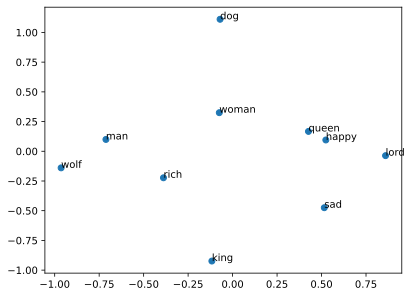

In [75]:
result= compute_pca(X, 2)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

You can see that man and king are next to each other. However, we have to be careful with the interpretation of this projected word vectors, since the PCA depends on the projection -- as shown in the following illustration.

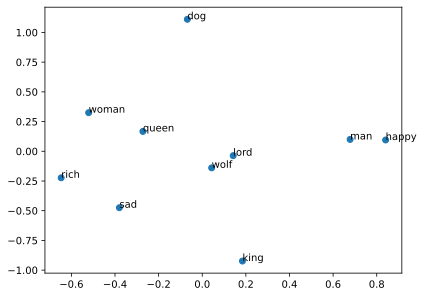

In [76]:
result= compute_pca(X, 4)
pyplot.scatter(result[:, 3], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 3], result[i, 1]))
pyplot.show()